In [6]:
data_path = "../data/raw/ethiopia_fi_unified_data.csv"
ref_codes_path = "../data/raw/reference_codes.csv"


In [11]:
import pandas as pd

# File paths
data_path = "../data/raw/ethiopia_fi_unified_data.xlsx"
ref_codes_path = "../data/raw/reference_codes.xlsx"

# Load Excel files
fi_data = pd.read_excel(data_path)
ref_codes = pd.read_excel(ref_codes_path)

# Quick look
print("FI Data shape:", fi_data.shape)
print(fi_data.head())

print("Reference Codes shape:", ref_codes.shape)
print(ref_codes.head())


FI Data shape: (43, 34)
  record_id  record_type category  pillar               indicator  \
0  REC_0001  observation      NaN  ACCESS  Account Ownership Rate   
1  REC_0002  observation      NaN  ACCESS  Account Ownership Rate   
2  REC_0003  observation      NaN  ACCESS  Account Ownership Rate   
3  REC_0004  observation      NaN  ACCESS  Account Ownership Rate   
4  REC_0005  observation      NaN  ACCESS  Account Ownership Rate   

  indicator_code indicator_direction  value_numeric value_text  value_type  \
0  ACC_OWNERSHIP       higher_better           22.0        NaN  percentage   
1  ACC_OWNERSHIP       higher_better           35.0        NaN  percentage   
2  ACC_OWNERSHIP       higher_better           46.0        NaN  percentage   
3  ACC_OWNERSHIP       higher_better           56.0        NaN  percentage   
4  ACC_OWNERSHIP       higher_better           36.0        NaN  percentage   

   ... impact_direction impact_magnitude impact_estimate lag_months  \
0  ...              N

In [15]:
print("FI Data shape:", fi_data.shape)
print("Reference Codes shape:", ref_codes.shape)


FI Data shape: (43, 34)
Reference Codes shape: (71, 4)


In [16]:
fi_data.head()


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


Records by type:
 record_type
observation    30
event          10
target          3
Name: count, dtype: int64


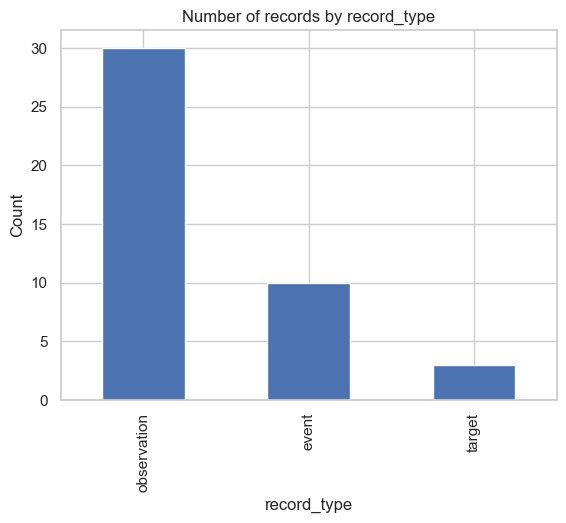

In [17]:
record_counts = fi_data['record_type'].value_counts()
print("Records by type:\n", record_counts)

# Plot the counts
record_counts.plot(kind='bar', title='Number of records by record_type')
plt.ylabel("Count")
plt.show()


In [18]:
indicators = fi_data['indicator_code'].unique()
print("Unique indicators:\n", indicators)


Unique indicators:
 ['ACC_OWNERSHIP' 'ACC_MM_ACCOUNT' 'ACC_4G_COV' 'ACC_MOBILE_PEN'
 'ACC_FAYDA' 'USG_P2P_COUNT' 'USG_P2P_VALUE' 'USG_ATM_COUNT'
 'USG_ATM_VALUE' 'USG_CROSSOVER' 'USG_TELEBIRR_USERS' 'USG_TELEBIRR_VALUE'
 'USG_MPESA_USERS' 'USG_MPESA_ACTIVE' 'USG_ACTIVE_RATE' 'AFF_DATA_INCOME'
 'GEN_GAP_ACC' 'GEN_MM_SHARE' 'GEN_GAP_MOBILE' 'EVT_TELEBIRR'
 'EVT_SAFARICOM' 'EVT_MPESA' 'EVT_FAYDA' 'EVT_FX_REFORM' 'EVT_CROSSOVER'
 'EVT_MPESA_INTEROP' 'EVT_ETHIOPAY' 'EVT_NFIS2' 'EVT_SAFCOM_PRICE']


Earliest observation: 2014-12-31 00:00:00
Latest observation: 2030-12-31 00:00:00


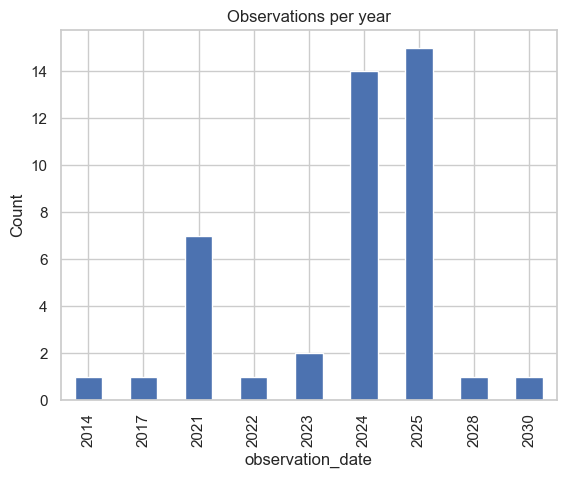

In [19]:
# Convert observation_date to datetime (if not already)
fi_data['observation_date'] = pd.to_datetime(fi_data['observation_date'], errors='coerce')

# Earliest and latest dates
print("Earliest observation:", fi_data['observation_date'].min())
print("Latest observation:", fi_data['observation_date'].max())

# Plot number of observations per year
obs_counts = fi_data.groupby(fi_data['observation_date'].dt.year)['record_type'].count()
obs_counts.plot(kind='bar', title='Observations per year')
plt.ylabel("Count")
plt.show()


In [20]:
# Select only event records
events = fi_data[fi_data['record_type'] == 'event'][['indicator', 'indicator_code', 'category', 'observation_date']]

# Sort by date
events = events.sort_values('observation_date')

# Show events
print("All events:\n", events)


All events:
                                  indicator     indicator_code        category  \
33                         Telebirr Launch       EVT_TELEBIRR  product_launch   
41                 NFIS-II Strategy Launch          EVT_NFIS2          policy   
34    Safaricom Ethiopia Commercial Launch      EVT_SAFARICOM    market_entry   
35                  M-Pesa Ethiopia Launch          EVT_MPESA  product_launch   
36        Fayda Digital ID Program Rollout          EVT_FAYDA  infrastructure   
37         Foreign Exchange Liberalization      EVT_FX_REFORM          policy   
38     P2P Transaction Count Surpasses ATM      EVT_CROSSOVER       milestone   
39            M-Pesa EthSwitch Integration  EVT_MPESA_INTEROP     partnership   
42       Safaricom Ethiopia Price Increase   EVT_SAFCOM_PRICE         pricing   
40  EthioPay Instant Payment System Launch       EVT_ETHIOPAY  infrastructure   

   observation_date  
33       2021-05-17  
41       2021-09-01  
34       2022-08-01  
35     

Confidence levels:
 confidence
high      40
medium     3
Name: count, dtype: int64


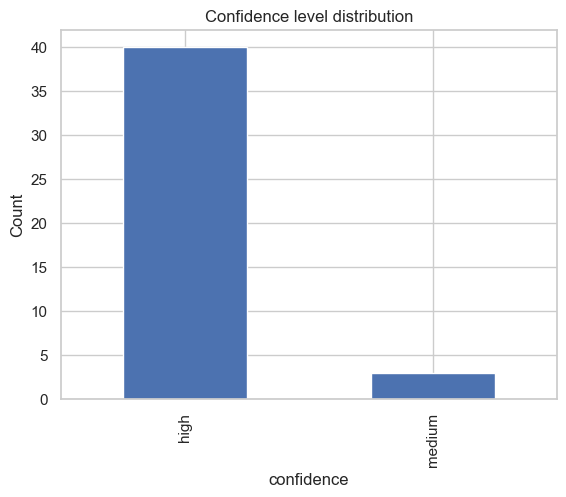

In [21]:
# Check if confidence column exists
if 'confidence' in fi_data.columns:
    conf_counts = fi_data['confidence'].value_counts()
    print("Confidence levels:\n", conf_counts)
    
    # Plot
    conf_counts.plot(kind='bar', title='Confidence level distribution')
    plt.ylabel("Count")
    plt.show()
else:
    print("No confidence column found in the dataset.")


In [22]:
# Load the entire Excel file (all sheets)
additional_data = pd.read_excel("../data/raw/Additional Data Points Guide.xlsx", sheet_name=None)

# See the sheet names
print("Sheets in Additional Data Points Guide:", additional_data.keys())


Sheets in Additional Data Points Guide: dict_keys(['A. Alternative Baselines', 'B. Direct Corrln', 'C. Indirect Corrln', 'D. Market Naunces'])


In [24]:
import pandas as pd
import datetime

# -----------------------------
# Load the Additional Data Points Guide
# -----------------------------
guide_path = "../data/raw/Additional Data Points Guide.xlsx"
additional_data = pd.read_excel(guide_path, sheet_name=None)

print("Sheets available:", additional_data.keys())

# Access specific sheets
sheet_a = additional_data['A. Alternative Baselines']
sheet_b = additional_data['B. Direct Corrln']
sheet_c = additional_data['C. Indirect Corrln']
sheet_d = additional_data['D. Market Naunces']

# -----------------------------
# Prepare new observations
# -----------------------------
new_observations = []

today = datetime.date.today()

# Example: 4G coverage (from sheet B)
new_observations.append({
    'record_id': 'REC_044',  
    'record_type': 'observation',
    'category': None,
    'pillar': 'ACCESS',
    'indicator': '4G Coverage',
    'indicator_code': 'ACC_4G_COV',
    'indicator_direction': 'higher_better',
    'value_numeric': 55.0,  # example projected value
    'value_text': None,
    'value_type': 'percentage',
    'unit': '%',
    'observation_date': pd.to_datetime('2025-12-31'),
    'period_start': None,
    'period_end': None,
    'fiscal_year': 2025,
    'gender': None,
    'location': None,
    'region': None,
    'source_name': 'GSMA Mobile Coverage Report',
    'source_type': 'report',
    'source_url': 'https://www.gsma.com/mobileeconomy/',
    'confidence': 'medium',
    'related_indicator': None,
    'relationship_type': None,
    'impact_direction': None,
    'impact_magnitude': None,
    'impact_estimate': None,
    'lag_months': None,
    'evidence_basis': 'Comparable country estimate',
    'comparable_country': 'Kenya',
    'collected_by': 'Yosef Maregn',
    'collection_date': today,
    'original_text': '4G coverage projected to reach 55% by 2025 according to GSMA forecast.',
    'notes': 'Useful for Access forecasting'
})

# Example: Mobile Money Active Accounts (ACC_MM_ACCOUNT)
new_observations.append({
    'record_id': 'REC_045',
    'record_type': 'observation',
    'category': None,
    'pillar': 'ACCESS',
    'indicator': 'Mobile Money Active Accounts',
    'indicator_code': 'ACC_MM_ACCOUNT',
    'indicator_direction': 'higher_better',
    'value_numeric': 12.0,  # example % adults
    'value_text': None,
    'value_type': 'percentage',
    'unit': '%',
    'observation_date': pd.to_datetime('2025-12-31'),
    'period_start': None,
    'period_end': None,
    'fiscal_year': 2025,
    'gender': None,
    'location': None,
    'region': None,
    'source_name': 'Telebirr & M-Pesa Operator Reports',
    'source_type': 'report',
    'source_url': 'https://www.nbe.gov.et/',
    'confidence': 'medium',
    'related_indicator': None,
    'relationship_type': None,
    'impact_direction': None,
    'impact_magnitude': None,
    'impact_estimate': None,
    'lag_months': None,
    'evidence_basis': 'Projected growth from operator data',
    'comparable_country': None,
    'collected_by': 'Yosef Maregn',
    'collection_date': today,
    'original_text': 'Estimated active mobile money accounts for 2025',
    'notes': 'Useful for Usage forecasting'
})

# Example: Gender Gap in Account Ownership (GEN_GAP_ACC)
new_observations.append({
    'record_id': 'REC_046',
    'record_type': 'observation',
    'category': None,
    'pillar': 'ACCESS',
    'indicator': 'Gender Gap in Account Ownership',
    'indicator_code': 'GEN_GAP_ACC',
    'indicator_direction': 'lower_better',
    'value_numeric': 10.0,  # example % difference male-female
    'value_text': None,
    'value_type': 'percentage',
    'unit': '%',
    'observation_date': pd.to_datetime('2025-12-31'),
    'period_start': None,
    'period_end': None,
    'fiscal_year': 2025,
    'gender': None,
    'location': None,
    'region': None,
    'source_name': 'Global Findex & Survey Microdata',
    'source_type': 'report',
    'source_url': 'https://globalfindex.worldbank.org/',
    'confidence': 'medium',
    'related_indicator': None,
    'relationship_type': None,
    'impact_direction': None,
    'impact_magnitude': None,
    'impact_estimate': None,
    'lag_months': None,
    'evidence_basis': 'Based on historical trend',
    'comparable_country': 'Kenya',
    'collected_by': 'Yosef Maregn',
    'collection_date': today,
    'original_text': 'Gender gap projected to be 10% by 2025',
    'notes': 'Important for Access model'
})

# -----------------------------
# Append new observations to fi_data
# -----------------------------
fi_data = pd.concat([fi_data, pd.DataFrame(new_observations)], ignore_index=True)

print("New FI Data shape after enrichment:", fi_data.shape)


Sheets available: dict_keys(['A. Alternative Baselines', 'B. Direct Corrln', 'C. Indirect Corrln', 'D. Market Naunces'])
New FI Data shape after enrichment: (46, 34)


C:\Users\Yosef Maregn\AppData\Local\Temp\ipykernel_7620\2068549631.py:142: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fi_data = pd.concat([fi_data, pd.DataFrame(new_observations)], ignore_index=True)


In [26]:
import pandas as pd
import datetime

today = datetime.date.today()

# -----------------------------
# 1️⃣ Add new events
# -----------------------------
new_events = [
    {
        'record_id': 'REC_EVT_011',
        'record_type': 'event',
        'category': 'product_launch',
        'pillar': None,  # leave empty
        'indicator': 'Telebirr Launch',
        'indicator_code': 'EVT_TELEBIRR',
        'indicator_direction': None,
        'value_numeric': None,
        'value_text': None,
        'value_type': None,
        'unit': None,
        'observation_date': pd.to_datetime('2021-05-01'),
        'period_start': None,
        'period_end': None,
        'fiscal_year': 2021,
        'gender': None,
        'location': None,
        'region': None,
        'source_name': 'NBE & Telebirr Press Release',
        'source_type': 'report',
        'source_url': 'https://www.nbe.gov.et/',
        'confidence': 'high',
        'related_indicator': None,
        'relationship_type': None,
        'impact_direction': None,
        'impact_magnitude': None,
        'impact_estimate': None,
        'lag_months': None,
        'evidence_basis': 'Historical observation',
        'comparable_country': None,
        'collected_by': 'Yosef Maregn',
        'collection_date': today,
        'original_text': 'Telebirr launched in May 2021, first major mobile money product in Ethiopia.',
        'notes': 'Key event for Usage forecasting'
    },
    {
        'record_id': 'REC_EVT_012',
        'record_type': 'event',
        'category': 'product_launch',
        'pillar': None,
        'indicator': 'M-Pesa Entry',
        'indicator_code': 'EVT_MPESA',
        'indicator_direction': None,
        'value_numeric': None,
        'value_text': None,
        'value_type': None,
        'unit': None,
        'observation_date': pd.to_datetime('2023-08-01'),
        'period_start': None,
        'period_end': None,
        'fiscal_year': 2023,
        'gender': None,
        'location': None,
        'region': None,
        'source_name': 'Safaricom Press Release',
        'source_type': 'report',
        'source_url': 'https://www.safaricom.et/',
        'confidence': 'high',
        'related_indicator': None,
        'relationship_type': None,
        'impact_direction': None,
        'impact_magnitude': None,
        'impact_estimate': None,
        'lag_months': None,
        'evidence_basis': 'Historical observation',
        'comparable_country': None,
        'collected_by': 'Yosef Maregn',
        'collection_date': today,
        'original_text': 'M-Pesa launched in Ethiopia in August 2023.',
        'notes': 'Key event for Usage forecasting'
    },
    {
        'record_id': 'REC_EVT_013',
        'record_type': 'event',
        'category': 'policy',
        'pillar': None,
        'indicator': 'NFIS-II Launch',
        'indicator_code': 'EVT_NFIS2',
        'indicator_direction': None,
        'value_numeric': None,
        'value_text': None,
        'value_type': None,
        'unit': None,
        'observation_date': pd.to_datetime('2022-08-01'),
        'period_start': None,
        'period_end': None,
        'fiscal_year': 2022,
        'gender': None,
        'location': None,
        'region': None,
        'source_name': 'National Bank of Ethiopia',
        'source_type': 'report',
        'source_url': 'https://www.nbe.gov.et/',
        'confidence': 'high',
        'related_indicator': None,
        'relationship_type': None,
        'impact_direction': None,
        'impact_magnitude': None,
        'impact_estimate': None,
        'lag_months': None,
        'evidence_basis': 'Policy release',
        'comparable_country': None,
        'collected_by': 'Yosef Maregn',
        'collection_date': today,
        'original_text': 'NFIS-II policy launched in Aug 2022 to increase financial inclusion.',
        'notes': 'Key event for Access and Usage'
    }
]

# Append events to fi_data
fi_data = pd.concat([fi_data, pd.DataFrame(new_events)], ignore_index=True)

# -----------------------------
# 2️⃣ Add example impact_links
# -----------------------------
new_impact_links = [
    {
        'record_id': 'REC_IMP_001',
        'record_type': 'impact_link',
        'category': None,
        'pillar': 'ACCESS',
        'indicator': None,
        'indicator_code': 'ACC_OWNERSHIP',
        'indicator_direction': None,
        'value_numeric': None,
        'value_text': None,
        'value_type': None,
        'unit': None,
        'observation_date': None,
        'period_start': None,
        'period_end': None,
        'fiscal_year': None,
        'gender': None,
        'location': None,
        'region': None,
        'source_name': None,
        'source_type': None,
        'source_url': None,
        'confidence': 'high',
        'related_indicator': None,
        'relationship_type': 'event_impact',
        'impact_direction': 'positive',
        'impact_magnitude': 5,  # +5 pp
        'impact_estimate': 'medium',
        'lag_months': 6,
        'evidence_basis': 'Historical trend and similar markets',
        'comparable_country': 'Kenya',
        'collected_by': 'Yosef Maregn',
        'collection_date': today,
        'original_text': 'Telebirr launch expected to increase account ownership by 5pp over 6 months.',
        'notes': 'Estimate for modeling'
    },
    {
        'record_id': 'REC_IMP_002',
        'record_type': 'impact_link',
        'category': None,
        'pillar': 'USAGE',
        'indicator': None,
        'indicator_code': 'USG_TELEBIRR_USERS',
        'indicator_direction': None,
        'value_numeric': None,
        'value_text': None,
        'value_type': None,
        'unit': None,
        'observation_date': None,
        'period_start': None,
        'period_end': None,
        'fiscal_year': None,
        'gender': None,
        'location': None,
        'region': None,
        'source_name': None,
        'source_type': None,
        'source_url': None,
        'confidence': 'high',
        'related_indicator': None,
        'relationship_type': 'event_impact',
        'impact_direction': 'positive',
        'impact_magnitude': 10,  # +10 pp
        'impact_estimate': 'medium',
        'lag_months': 6,
        'evidence_basis': 'Operator reports',
        'comparable_country': 'Kenya',
        'collected_by': 'Yosef Maregn',
        'collection_date': today,
        'original_text': 'Telebirr launch expected to increase active users by 10pp over 6 months.',
        'notes': 'Estimate for modeling'
    }
]

# Append impact_links to fi_data
fi_data = pd.concat([fi_data, pd.DataFrame(new_impact_links)], ignore_index=True)

print("New FI Data shape after adding events and impact_links:", fi_data.shape)


New FI Data shape after adding events and impact_links: (51, 34)


C:\Users\Yosef Maregn\AppData\Local\Temp\ipykernel_7620\2800627578.py:121: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fi_data = pd.concat([fi_data, pd.DataFrame(new_events)], ignore_index=True)
C:\Users\Yosef Maregn\AppData\Local\Temp\ipykernel_7620\2800627578.py:121: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fi_data = pd.concat([fi_data, pd.DataFrame(new_events)], ignore_index=True)
C:\Users\Yosef Maregn\AppData\Local\Temp\ipykernel_7620\2800627578.py:202: FutureWarning: The behavior of 